<a href="https://colab.research.google.com/github/HEMANTHSAINI/colab-project/blob/MASTER/alphabets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving image.npz to image.npz


In [5]:
from google.colab import files
uploaded = files.upload()

Saving labels.csv to labels.csv


In [7]:
X = np.load('image.npz')['arr_0']
y = pd.read_csv("labels.csv")["labels"]
print(pd.Series(y).value_counts())
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
nclasses = len(classes)

B    550
D    550
F    550
K    550
N    550
H    550
T    550
P    550
O    550
S    550
G    550
Y    550
V    550
X    550
E    550
Q    550
U    550
I    550
C    550
W    550
Z    550
M    550
J    550
L    550
R    550
A    550
Name: labels, dtype: int64


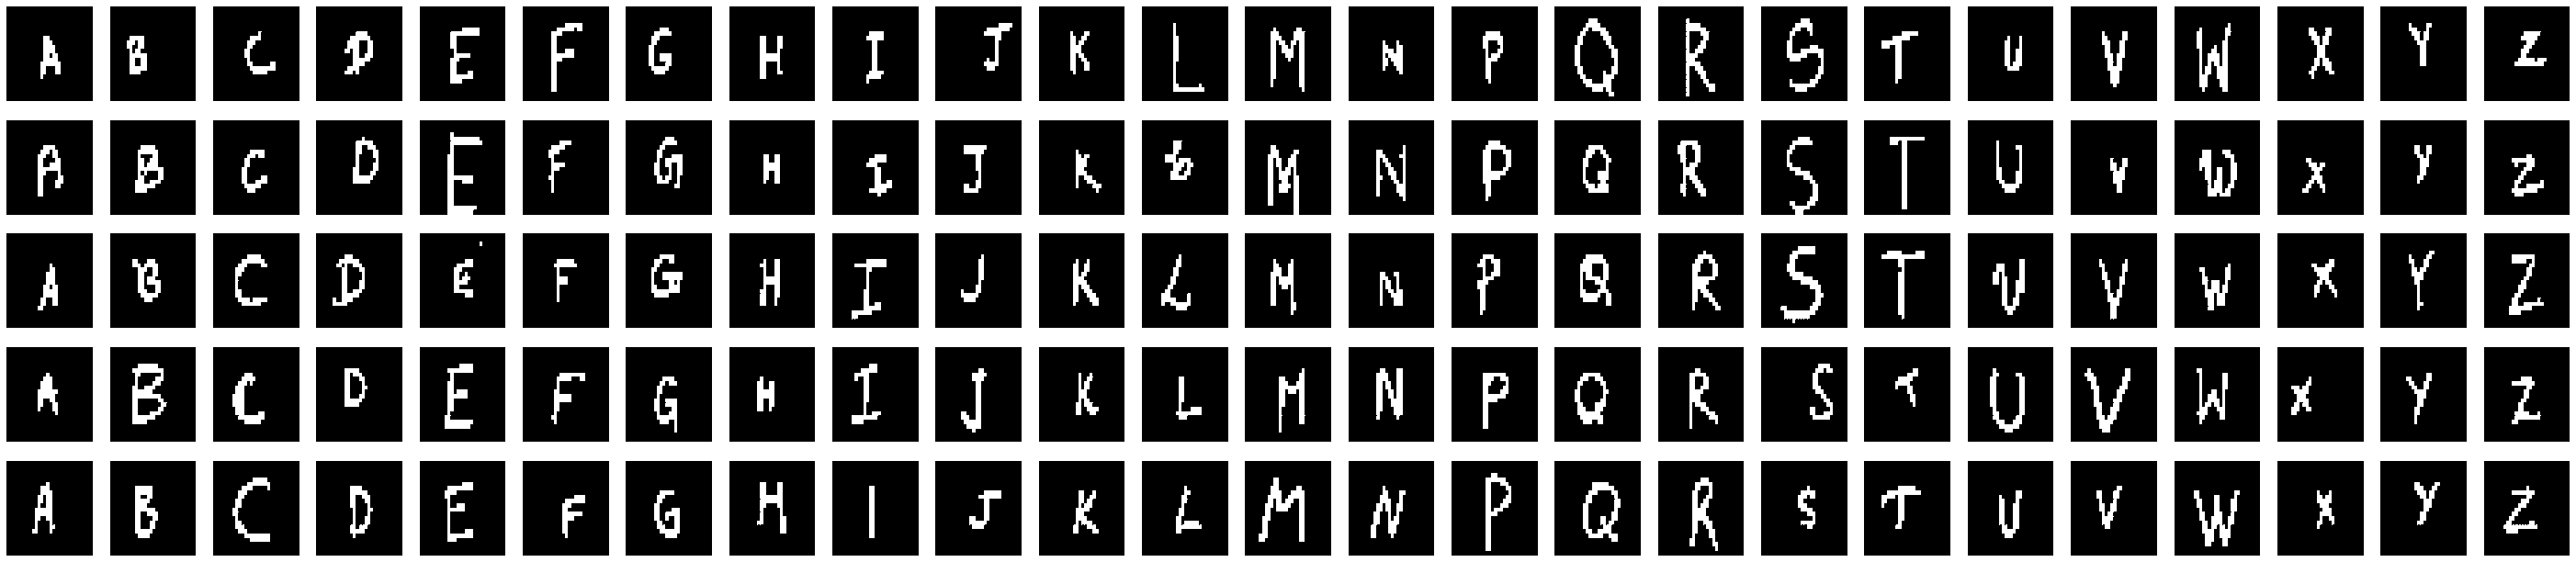

In [8]:
samples_per_class = 5
figure = plt.figure(figsize=(nclasses*2, (1+samples_per_class*2)))

idx_cls = 0
for cls in classes:
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace = False)
  i = 0
  for idx in idxs:
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (22, 30)), cmap = plt.cm.gray,
              xticklabels = False, yticklabels = False, cbar = False);
    p = plt.axis('off');
    i += 1
  idx_cls += 1

In [9]:
print(len(X))

14300


In [10]:
print(len(X[0]))

660


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 7500,test_size = 2500, random_state = 0)
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

clf = LogisticRegression(solver ='saga', multi_class = 'multinomial').fit(X_train_scaled, y_train)
print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [12]:
y_pred = clf.predict(X_test_scaled)
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.992


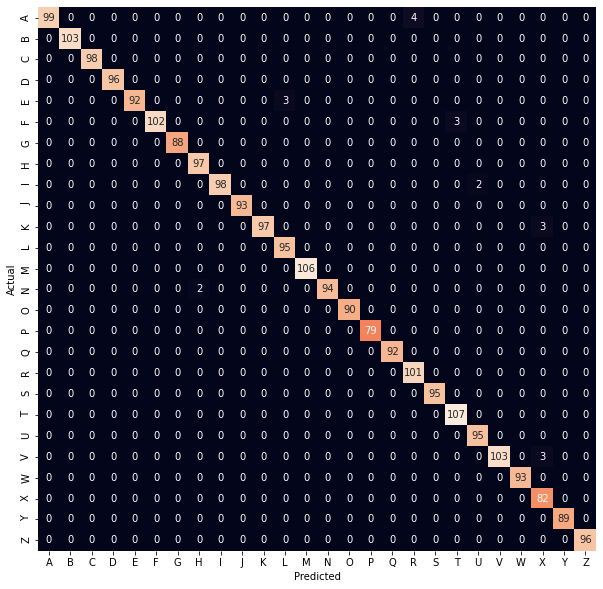

In [13]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames = ['Predicted'])

p = plt.figure(figsize = (10,10));
p = sns.heatmap(cm, annot = True, fmt="d", cbar=False)